#### Basic Back Propagation

In [ ]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
weights = {}

##### dataset

In [ ]:
class Data_set():
    def read_data(data_path):
        base_x_train=[]
        base_y_train=[]
        label_folder = []
        total_size = 0
        for root, dirts, files in os.walk(data_path):
            for dirt in dirts:
                label_folder.append(dirt)
            total_size += len(files)
        for i in range(len(label_folder)):
            print(label_folder[i])
            labelPath = data_path+r'\\'+label_folder[i]
            FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
            for j in range(len(FileName)):
                path = labelPath+r'\\'+FileName[j]
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.normalize(img,0,1,norm_type=cv2.NORM_MINMAX)
                base_x_train.append(np.array(img).reshape(28*28,1).astype(np.float16))
                base_y_train.append(label_folder[i])
        print(np.array(base_x_train).shape)
        indexs = np.random.choice(total_size,total_size, replace=False)
        print(indexs)
        return base_x_train, base_y_train, indexs, total_size

    def read_testdata(data_path):
        FileName = []
        total_size = 0
        base_x_test=[]
        for root, dirts, files in os.walk(data_path):
            for file in files:
                FileName.append(file)
            total_size += len(files)
        for filename in FileName:
            imgPath = data_path +r'\\'+ filename
            img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
            img = cv2.normalize(img,0,1,norm_type=cv2.NORM_MINMAX)
            base_x_test.append(np.array(img).reshape(28*28,1).astype(np.float16))
        return FileName, base_x_test

    def write_data(data_path,FileName,y_pred):
        for index,filename in enumerate(FileName):
            path = data_path +r'\\711083115.txt'
            txt_name = filename.split('.')[0]

            with open(path,'a') as f:
                f.write(txt_name + " " + str(y_pred[index])+"\n")
    def test_accuracy():
        data_path = r"D:\Code\py\NerualNetwork\data\Train data"
        f1 = r"test_Ans.txt"
        f2 = r"711083115.txt"
        ans = {}
        pre = {}
        total_size = 0
        acc = 0
        err = 0
        with open(data_path+"\\"+f2) as p:
            for line in p.readlines():
                t = line.split(" ")
                pre[t[0]] = t[1]

        with open(data_path+r"\\"+f1) as a:
            for line in a.readlines():
                total_size+=1
                t = line.split(" ")
                ans[t[0]] = t[1]

        for key, values in ans.items():
            if pre[key] == values:
                acc += 1
            else:
                err += 1
        print("acc: ", (acc/total_size)*100)
        print("err: ", (err/total_size)*100)


##### activate function


In [ ]:
class activate_function():
    def sigmoid (x):
        return 1/(1+np.exp(-x))
    
    def threshold(x):
        if x >= 0.5:
            return 1
        else:
            return 0

##### network

In [ ]:
class network():
    def createHidden(layer,inputsize, outputsize):
        num = round(np.sqrt(6/(inputsize+outputsize)),5)
        weights[layer] = np.asmatrix(np.random.uniform(-num,num,outputsize*inputsize).reshape(outputsize, inputsize))


    def deltaW (output, Error):
        one = np.asmatrix(np.ones(output.size)).T   
        deltaset = np.multiply(np.multiply(output, (one-output)),Error).astype('float16')
        return deltaset

##### Main file

In [ ]:
#from network import *
import time
import numpy
import matplotlib.pyplot as plt
import cv2
delta_w = {}

def train(x,y,learningrate):
    layerOutput = {}

    for layer, w in weights.items():
        if layer == "I_h1":
            tmp = x.copy()
        layerOutput[layer] = activate_function.sigmoid(np.dot(w,tmp)).astype(np.float16)
        tmp = layerOutput[layer]
        if layer == "h1_O":
            predict = tmp
    delta = {}
    # bp
    if np.all(predict != y):
        # delta
        for layer, value in reversed(layerOutput.items()):
            if layer == "h1_O":
                delta[layer] = network.deltaW(predict, y- predict)
            else:
                delta[layer] = network.deltaW(value, weights[prelayer].T*delta[prelayer])
            prelayer = layer
        #learning*del*input = delta_w
        for layer, value in weights.items():
            if layer == "I_h1":
                input = x.T
            else:
                input = layerOutput[prelayer].T
            try:
                delta_w[layer] = np.sum([delta_w[layer],learningrate*delta[layer]*input], axis=0)
            except:
                delta_w[layer] = learningrate*delta[layer]*input
            prelayer = layer

# 4861/5000 97.22 accuracy
def evaluate(indexs,x_train,y_train):
    accuracy = 0
    # error = 0
    for index in indexs:
        x = x_train[index]
        num = int(y_train[index])
        # y = np.asmatrix([0,0,0,0,0,0,0,0,0,0]).reshape(10,1)
        # y[num] = 1
        layerOutput = {}
        for layer, w in weights.items():
            if layer == "I_h1":
                tmp = x.copy()
            layerOutput[layer] = activate_function.sigmoid(np.dot(w,tmp)).astype(np.float16)
            tmp = layerOutput[layer]
            if layer == "h1_O":
                predict = tmp
                # t = y-predict
                # error += 0.5*np.sum(np.multiply(t,t))
        if np.argmax(predict) == num:
            accuracy += 1
    print(accuracy)
    return accuracy/len(indexs)

def test(x_test):
    y_pred = []
    for img in x_test:
        layerOutput = {}
        for layer, w in weights.items():
            if layer == "I_h1":
                tmp = img.copy()
            layerOutput[layer] = activate_function.sigmoid(np.dot(w,tmp)).astype(np.float16)
            tmp = layerOutput[layer]
            if layer == "h1_O":
                predict = tmp.copy()
        y_pred.append(np.argmax(predict))
    return y_pred

if __name__ =="__main__":
    data_path=r"D:\Code\py\NerualNetwork\data\Training data"
    x_train, y_train, indexs,total_size=Data_set.read_data(data_path)
    print(total_size)

    learningrate = 0.1
    network.createHidden(layer="I_h1",inputsize=784,outputsize=64)
    network.createHidden(layer="h1_O",inputsize=64,outputsize=10)
    
    for epoch in range(15):
        k=0
        st= time.time()
        for index in indexs:
            x = x_train[index]
            y = np.asmatrix([0,0,0,0,0,0,0,0,0,0]).reshape(10,1)
            num = int(y_train[index])
            y[num] = 1
            train(x,y,learningrate)

            for layer, value in delta_w.items():
                weights[layer] += value                       #debug 2天 +->-
            delta_w={}
        acc =evaluate(indexs, x_train, y_train)
        e = time.time()
        print("Iter: {index:>4d}, accuracy: {accuracys: .4f}, time: {time: .4f}".format(index=epoch,accuracys=acc*100,time=e-st))
    test_path = r"D:\Code\py\NerualNetwork\data\Testing data"
    fileName, x_test=Data_set.read_testdata(test_path)
    y_pred = test(x_test)
    result_path = r"D:\Code\py\NerualNetwork\data"
    Data_set.write_data(result_path, fileName, y_pred)
    # Data_set.test_accuracy()

#### Build simple CNN

##### Importing the necessary modules

In [ ]:
import numpy as np
import os
from os import listdir 
from os.path import isfile, join
import cv2

import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

##### Loading and Preprocessing

In [ ]:
#Data visiting – os.walk()

label_folder = []
total_size = 0
data_path = r"C:\Users\anita\Desktop\TA\CIFAR10_Test Image\Training_data"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 25000 files.
folder: ['0', '1', '2', '3', '4']


In [ ]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000, 5)


In [ ]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000, 5)


In [ ]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000,)


##### Splitting the Data into training and validation data

In [ ]:
# Split into training and validation sets
train_num = 23750
x_train, x_valid = np.array(base_x_train)[:train_num], np.array(base_x_train)[train_num:]
y_train, y_valid = np.array(base_y_train)[:train_num], np.array(base_y_train)[train_num:]

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_valid.shape, y_valid.shape)

Training data: (23750, 32, 32, 3) (23750, 5)
Validation data: (1250, 32, 32, 3) (1250, 5)


##### Show the image

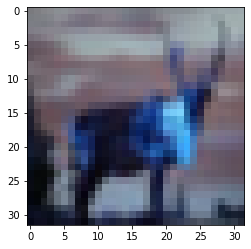

Answer: 4
Answer(one-hot): [0. 0. 0. 0. 1.]


In [ ]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

##### Build the network

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [ ]:
# You can show the detail for it:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

##### Training the network

In [ ]:
epoch = 10
batch_size = 20

model.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)
#Saving the trained weights
model.save("my_model.hdf5")

Epoch 1/10
1188/1188 [==============================] - 9s 6ms/step - loss: 269.7774 - accuracy: 0.2118 - val_loss: 1.7562 - val_accuracy: 0.0000e+00
Epoch 2/10
1188/1188 [==============================] - 7s 6ms/step - loss: 1.6045 - accuracy: 0.2168 - val_loss: 1.8375 - val_accuracy: 0.0000e+00
Epoch 3/10
1188/1188 [==============================] - 6s 5ms/step - loss: 1.6032 - accuracy: 0.2111 - val_loss: 1.8389 - val_accuracy: 0.0000e+00
Epoch 4/10
1188/1188 [==============================] - 6s 5ms/step - loss: 1.6035 - accuracy: 0.2121 - val_loss: 1.8540 - val_accuracy: 0.0000e+00
Epoch 5/10
1188/1188 [==============================] - 6s 5ms/step - loss: 1.6030 - accuracy: 0.2095 - val_loss: 1.8408 - val_accuracy: 0.0000e+00
Epoch 6/10
1188/1188 [==============================] - 6s 5ms/step - loss: 1.6037 - accuracy: 0.2084 - val_loss: 1.8469 - val_accuracy: 0.0000e+00
Epoch 7/10
1188/1188 [==============================] - 6s 5ms/step - loss: 1.6043 - accuracy: 0.2098 - val_lo

#### Evaluate Model

In [ ]:
import pandas as pd #need install "canda install pandas"

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(x_test, y_test)

x_new = x_test[:3]
y_predict = model.predict(x_new)
print("Predict probabilities:", y_predict.round(2))
print("Predict answers:", y_predict.argmax(axis=1))

In [ ]:

# Get the classification accuracy and loss-value
# for the training-set.
acc = history.history['accuracy']
loss = history.history['loss']

# Get it for the validation-set (we only use the test-set).
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot the accuracy and loss-values for the training-set.
plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
plt.plot(loss, 'o', color='b', label='Training Loss')
    
# Plot it for the test-set.
plt.plot(val_acc, linestyle='--', color='r', label='Val Acc.')
plt.plot(val_loss, 'o', color='r', label='Val Loss')

# Plot title and legend.
plt.title('Training and Val Accuracy')
plt.legend()

# Ensure the plot shows correctly.
plt.show()